In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'baseline_nexp2_v1.7_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)


In [3]:
bundleList = []
sql = ''
metric = metrics.CountMetric(col='night')
slicer = slicers.HealpixSlicer()
summaryStats = [metrics.SumMetric()]
plotDict = {'colorMax': 900}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'night', 'fieldRA'].
Found 2045493 visits
Running:  ['opsim_Count_night_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 840 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 641.016  dipole: lon: 67.6826, lat: -76.4263, amp: 236.816
  mono, lon, lat, amp


Plotting complete.


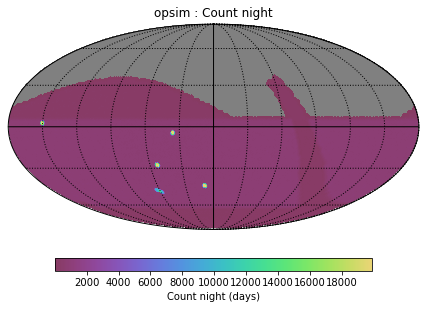

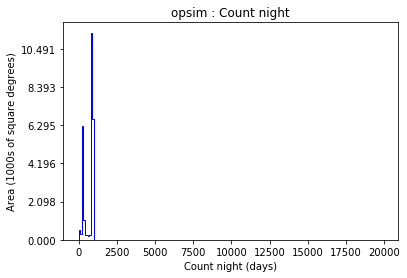

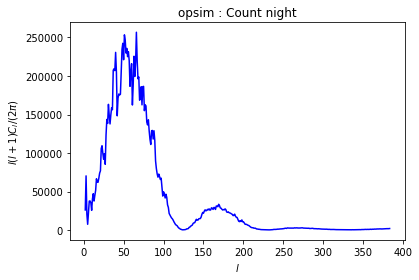

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

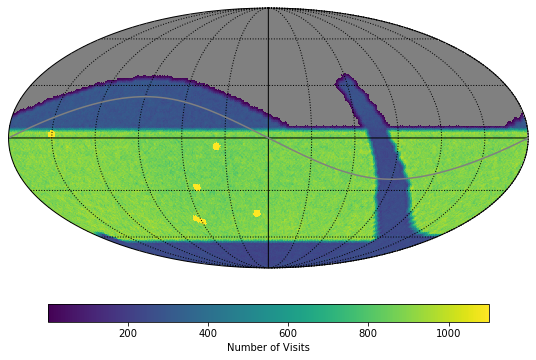

In [5]:
hp.mollview(bundleList[0].metricValues, max=1100, title='', cbar=False)
hp.graticule(dpar=30, dmer=30, verbose=False)
ax = plt.gca()
im = ax.get_images()[0]
cb = plt.colorbar(im, shrink=0.75, aspect=25, pad=0.1, orientation='horizontal',
                              format=None, extendrect=True)
cb.set_label('Number of Visits')

raCen=0
ecinc = 23.439291 * (np.pi / 180.0)
ra_ec = np.arange(0, np.pi * 2., (np.pi * 2. / 360.))
dec_ec = np.sin(ra_ec) * ecinc
lon = -(ra_ec - raCen - np.pi) % (np.pi * 2) #- np.pi

hp.projplot( np.degrees(lon), np.degrees(dec_ec), 'gray', lonlat=True)
plt.savefig('nvis_pretty_17.pdf')